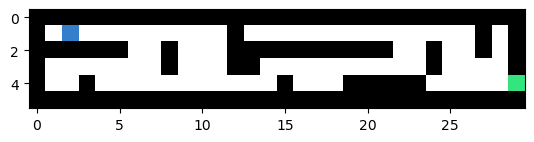

Coordenadas inicial: (2, 1)
Coordenadas meta:(29, 4)


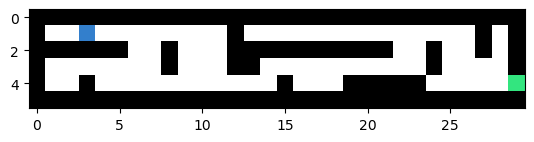

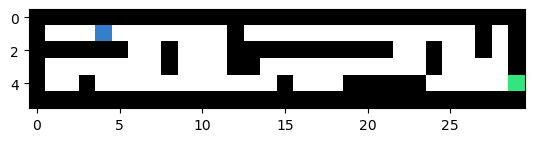

In [38]:
%run /home/kinlo/Documents/Proyecto/Recursos_dig/IA_aprendizaje/Maze.ipynb

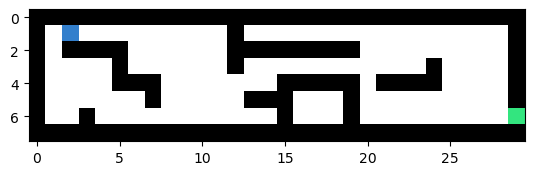

In [39]:
mapa = """
##############################
# o         #                #
# ####      ########         #
#    #      #           #    #
#    ###       ##### ####    #
#      #     ###   #         #
#  #           #   #         x
##############################
"""

ent = Maze(mapa)
ent.draw()

In [40]:
class LIFOQueue(object):
    """Clase de una cola FIFO en los problemas de busqueda"""
    def __init__(self) -> None:
        self.queue = []

    def __str__(self) -> str:
        return ''.join([str(q) for q in self.queue])
    
    def isEmpty(self):
        """Revisa si la pila es vacia"""
        return self.queue == []
    
    def push(self, element):
        """Introduce un elemento a la pila"""
        self.queue.append(element)
    
    def pop(self):
        """Saca el ultimo elemento de la pila"""
        last_element = self.queue[-1]
        del self.queue[-1]

        return last_element
    
    def top(self):
        """Muestra el elemento en el tope de la pila"""
        item = self.queue[-1]
        
        return item
    
    

In [41]:
class Node(object):
    """Clase para crear nodos con sus atributos"""
    def __init__(self) -> None:
        self.state = (0, 0)
        self.parent = None 
        self.action = None
    
    def __str__(self) -> str:
        if self.parent == None:
            return f"State: {self.state}"
        else:
            return f"State: {self.state}, Action: {self.action}, Parent: {self.parent}"
        
def expand(problem, node):
    """Función para expandir los nodos dado el problema """
    #Nodo inicial 
    s = node.state

    for action in problem.actions(s):
        #Ejecuta la acción 
        new_s = problem.result(s, action)

        #Genera un nuevo nodo 
        new_node, new_node.state, new_node.parent, new_node.action = Node(), new_s, node, action

        yield new_node 
    


In [42]:
def DepthFirstSearch(problem: Maze):
    #Almacenamiento de nodos 
    nodes = []
    #Nodo inicial 
    node = Node()
    node.state = problem.initial 
    
    #Revisa si el nodo es meta
    if node in problem.goal:
        return nodes 
    
    #Fronterea con colal de prioridad 
    frontier = LIFOQueue()
    frontier.push(node)
    #Nodos alcanzados 
    reached = {problem.initial:node}

    while not frontier.isEmpty():
        #Pop en la frontera 
        node = frontier.pop()
        #Revisa si el nodo es meta 
        if problem.is_goal(node.state):
            nodes.append(node)
            return nodes
        #Guarda el nodo en la lista
        nodes.append(node)

        #Expande el nodo actual 
        for child in expand(problem, node):
            #Guarda el estado del hijo 
            state = child.state
        
            #Guarda los hijosno alcanzados o que tengan menor costo 
            if state not in reached.keys():
                reached[state] = child
                frontier.push(child)

    return "No se ha logrado llegar a un estado final"
    


In [43]:
tree = DepthFirstSearch(ent)

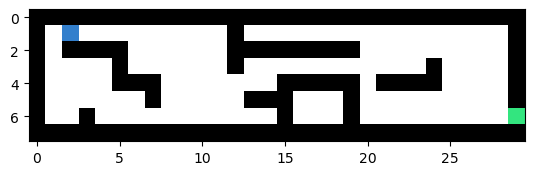

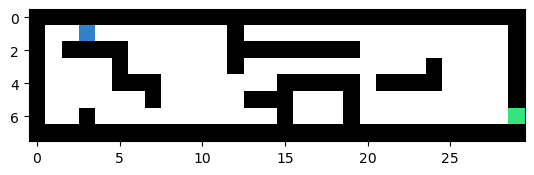

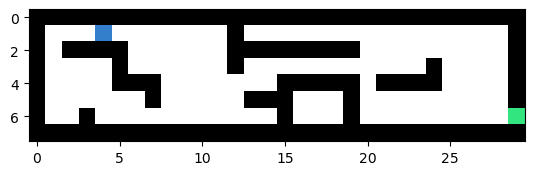

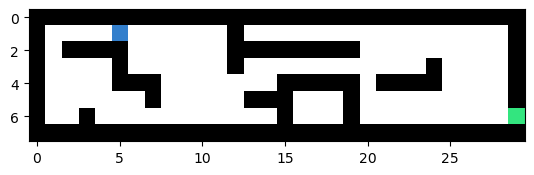

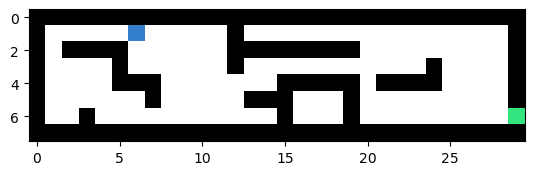

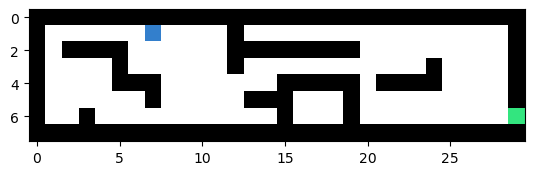

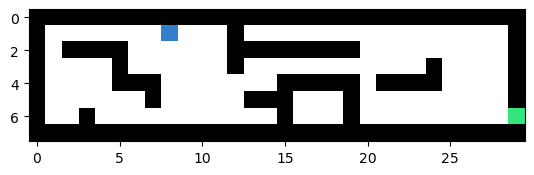

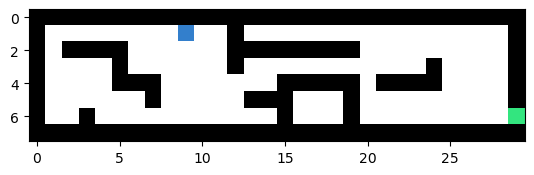

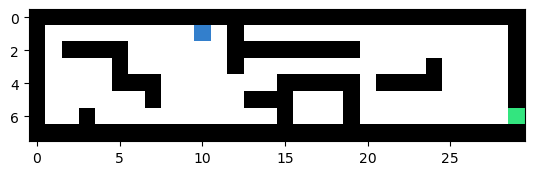

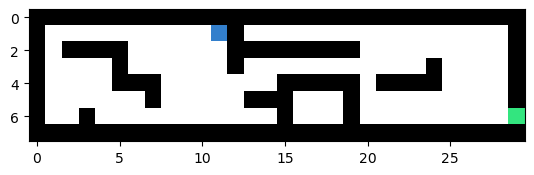

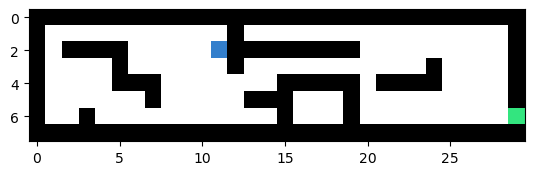

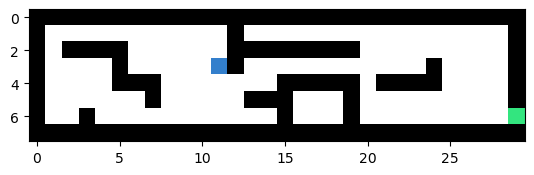

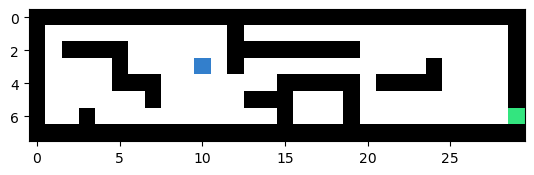

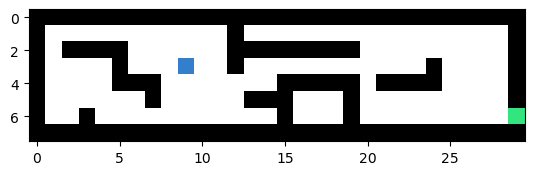

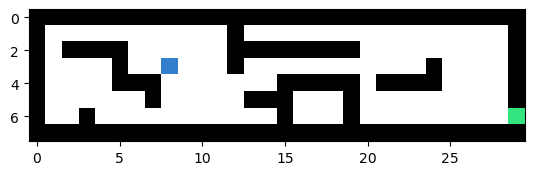

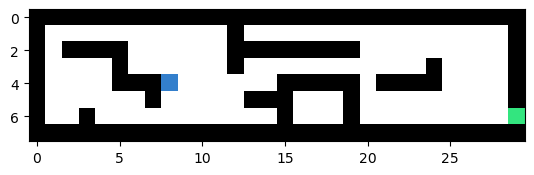

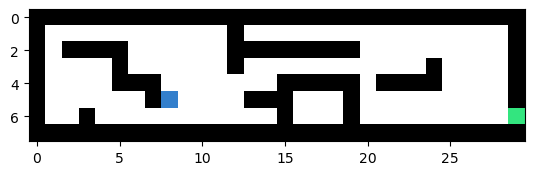

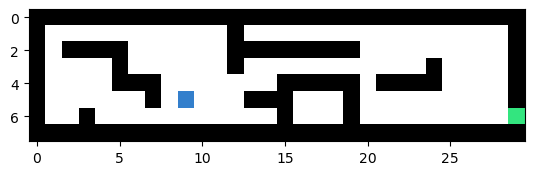

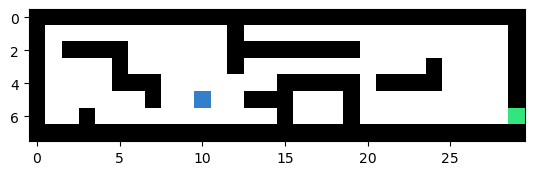

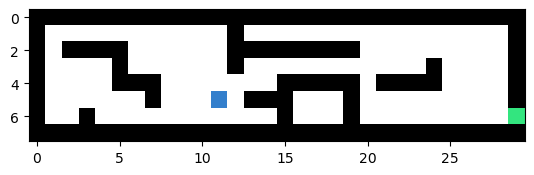

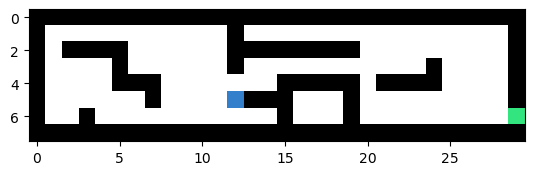

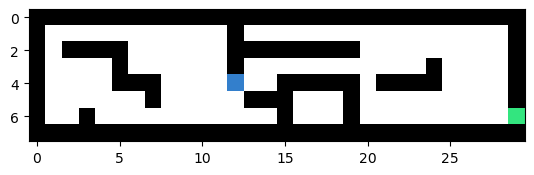

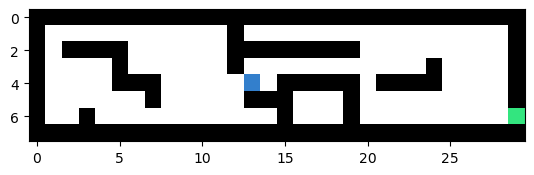

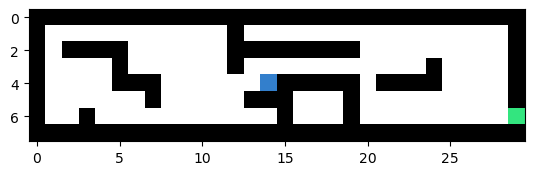

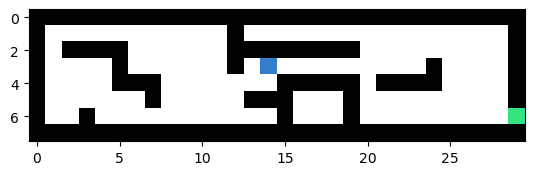

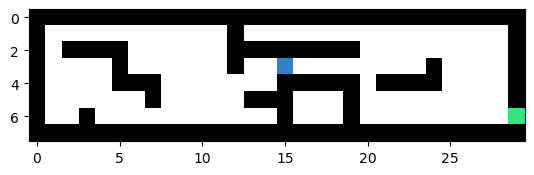

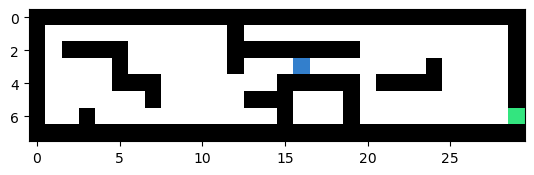

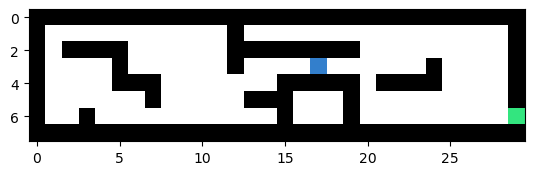

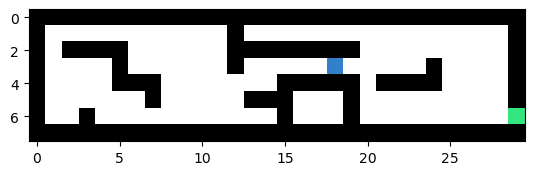

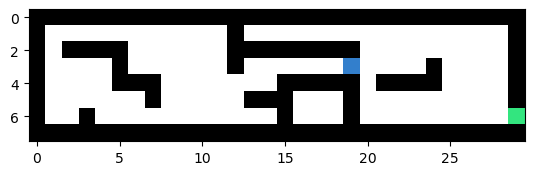

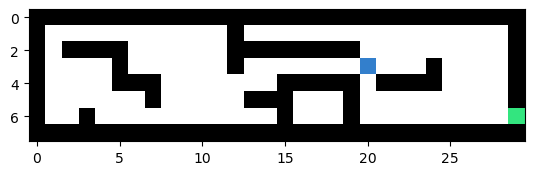

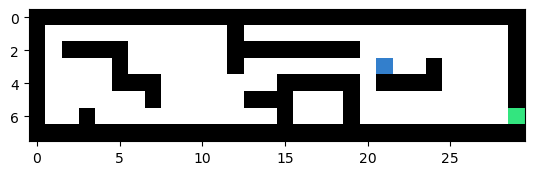

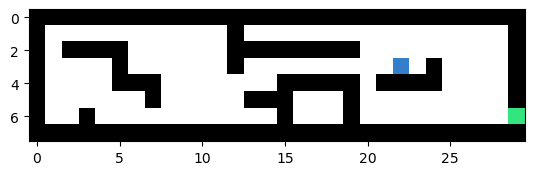

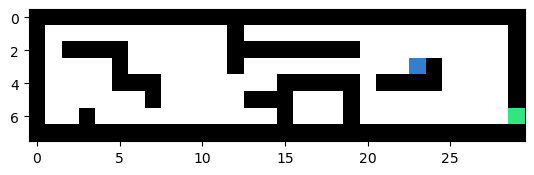

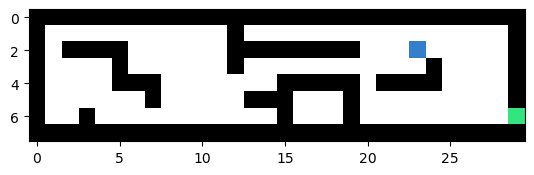

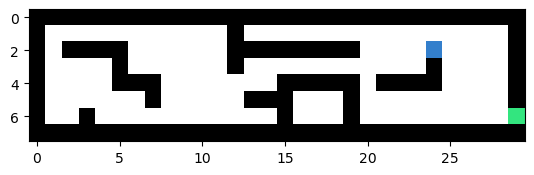

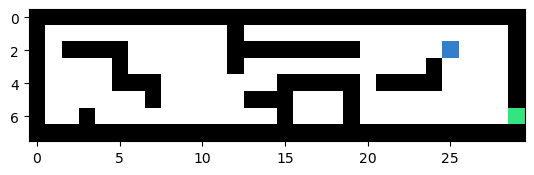

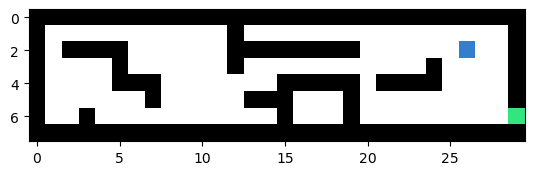

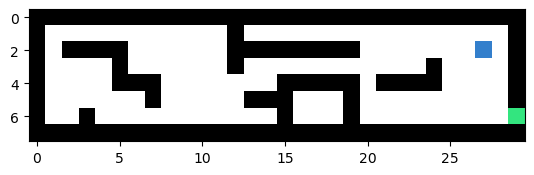

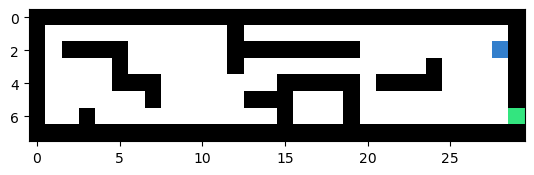

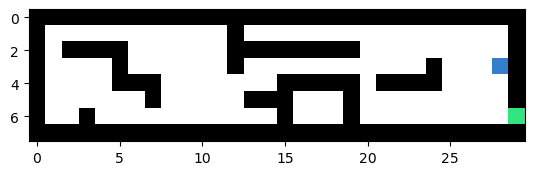

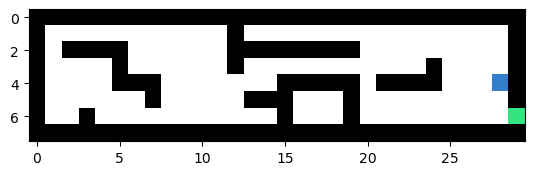

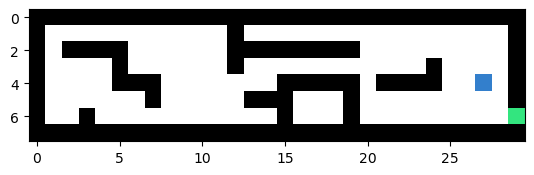

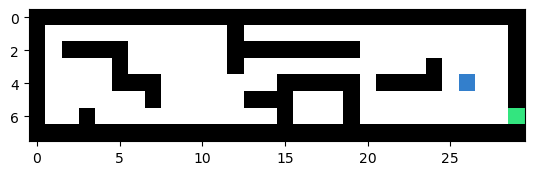

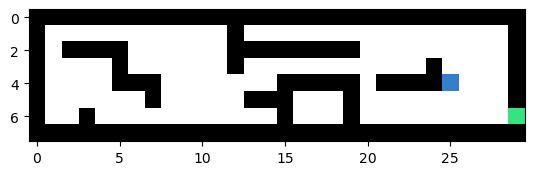

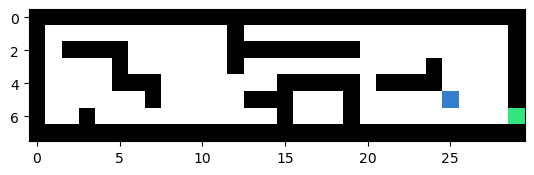

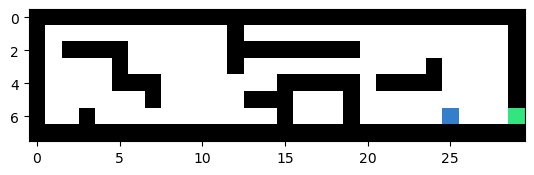

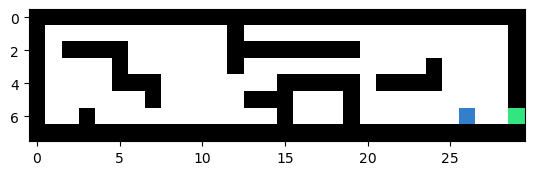

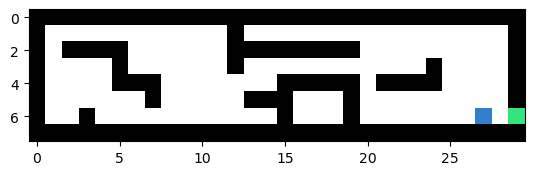

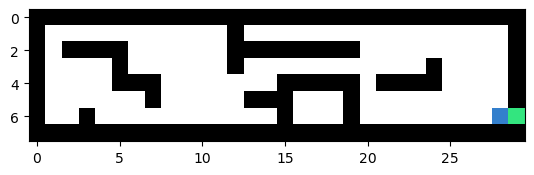

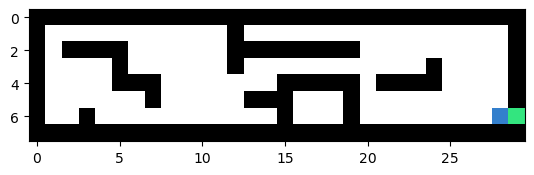

51


In [44]:
def get_path(search_tree, root):
    """Recorre el árbol de búsqueda de atrás hacia el inicio para obtener el camino
    que llevara a la meta"""
    #Meta 
    leaf = search_tree[::-1][0]
    #Padre de la meta
    parent = leaf.parent
    #Adjunta la meta y su padre al camino 
    path = [leaf, parent]
    #Recorre el árbol de búsqueda hasta el inicial 
    while parent.state != root:
        parent = parent.parent
        #Adjunto los padres en el camino
        path.append(parent)
    
    return path[::-1]

#Visualiza la solución 
prev_s = ent.initial
for n in get_path(tree, ent.initial):
    ent.move(prev_s, n.state)
    prev_s = n.state
    ent.draw()

print(len(get_path(tree, ent.initial)))